# PCA Introduction

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
penguins = pd.read_csv('data/penguins.csv').dropna().reset_index(drop = True)

In [3]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
329,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
330,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
331,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


We can look at the relationship between all pairs of numeric variables using a seaborn pairplot.

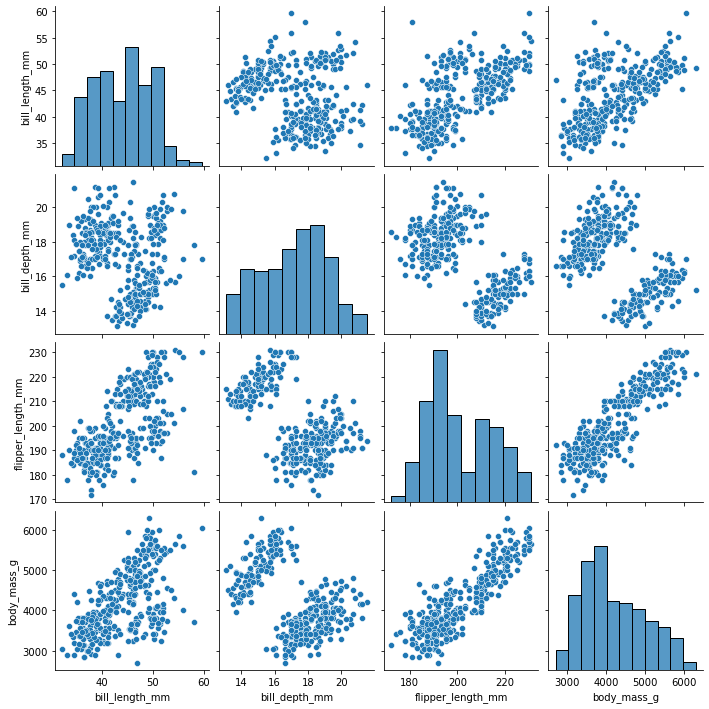

In [8]:
numeric_vars = ['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']
sns.pairplot(penguins[numeric_vars]);

But, these might not give us the "best" view of the dataset.

Let's see what happens when we apply principal components analysis to this dataset.

In [9]:
pca_penguins = PCA().fit(penguins[numeric_vars])

Let's inspect the coordinates of the components

In [62]:
component_num = 0

components = pd.DataFrame({
    'variable': pca_penguins.feature_names_in_,
    'coordinate': pca_penguins.components_[component_num]
})

components

,variable,coordinate
0,bill_length_mm,0.004003
1,bill_depth_mm,-0.001154
2,flipper_length_mm,0.015195
3,body_mass_g,0.999876


**Question 1:** What do you notice about the the coordinates for the first principal component? Why might this be the case?

PCA is supposed to be a method which preserves as much of the variance as possible in the dataset.

Fill in the code to find the variance of each numeric variable in the penguins data. 

**Question 2:** What is the variance of the body_mass_g variable? 

**Question 3:** What is the total variance in the dataset (the sum of the variance across all variables)?

In [39]:
# Fill in the code to answer the above questions.

In [63]:
penguins[numeric_vars].var()

bill_length_mm           29.906333
bill_depth_mm             3.877888
flipper_length_mm       196.441677
body_mass_g          648372.487699
dtype: float64

In [64]:
penguins[numeric_vars].var().sum()

648602.7135969105

Now, let's project our dataset onto the principal components.

In [65]:
penguins_projection = pca_penguins.transform(penguins[numeric_vars])

**Question 4:** What is the variance of the projection onto the first principal component? Hint: This will be the first column of the projection.

In [66]:
# Fill this in

In [67]:
penguins_projection.var(axis = 0, ddof = 1)

array([6.48533462e+05, 5.07358125e+01, 1.61549819e+01, 2.36086761e+00])

Compare this quantity to the `explained_variance_` of our pca model.

In [68]:
pca_penguins.explained_variance_

array([6.48533462e+05, 5.07358125e+01, 1.61549819e+01, 2.36086761e+00])

Now, let's scale our dataset before applying pca.

In [70]:
pca_pipe = Pipeline(steps = [
    ('scale', StandardScaler()),
    ('pca', PCA())
])

pca_pipe.fit(penguins[numeric_vars])

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA())])

Look at the new coefficients for the components. What do you notice?

In [71]:
component_num = 0

components = pd.DataFrame({
    'variable': pca_pipe.feature_names_in_,
    'coefficient': pca_pipe['pca'].components_[component_num]
})

components

,variable,coefficient
0,bill_length_mm,0.453753
1,bill_depth_mm,-0.399047
2,flipper_length_mm,0.576825
3,body_mass_g,0.549675


Finally, let's visualize the projection onto the first two principal components.

In [72]:
penguins_projection = pca_pipe.transform(penguins[numeric_vars])

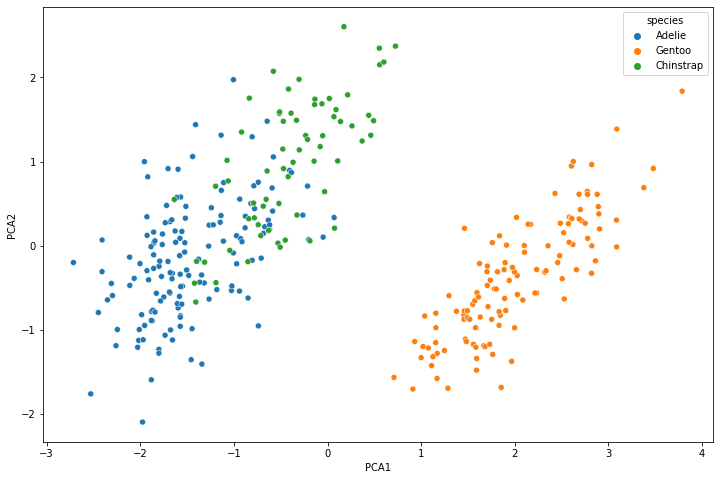

In [73]:
plt.figure(figsize = (12,8))

sns.scatterplot(x = penguins_projection[:,0], 
                y = penguins_projection[:,1], 
                hue = penguins['species'])

plt.xlabel('PCA1')
plt.ylabel('PCA2');